In [ ]:
import pandas as pd
import json
import networkx as nx
import struct
import matplotlib.pyplot as plt
from statistics import mean

from matplotlib import pylab
plt.figure(figsize=(30, 30)) 

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

In [ ]:
f = open('blocks_max.json')
blockchain = json.load(f)
f.close()

In [ ]:
f = open('ddosed_blocks.json')
ddosed_blocks_id = json.load(f)
f.close()

In [ ]:
f_list = list()
edge_ddos = list()
for chain in blockchain['chain']:
  if chain == blockchain['chain'][0]:
    continue

  transactions = chain["transactions"]
  edgs_chain = list()
  time = 0
  amount = 0
  #iterate all transactions in block
  for transaction in transactions:
    amount += transaction["amount"]
    recipient = transaction["recipient"]
    sender = transaction["sender"]
    time += transaction["time"]
    edgs_chain.append((sender,recipient))

  if (chain["index"]-1) in ddosed_blocks_id:
    edge_ddos.append(edgs_chain)
  
  #calc params for our formula:
  E = len(edgs_chain) # num of edges in our graph
  dt = time / len(transactions)
  V_a = amount / len(transactions)

  f = E / V_a

  #if chain["index"]<=116 and chain["index"]>=114:
  #  print("Params: E: ", E,"dt: ", dt, "V_a: ", V_a, "f: ", f)

  f_list.append(f)
  
#
#             |E|
#f = _____________________
#              V_a
#


In [ ]:
df = pd.DataFrame(f_list)
df.describe()

,0
count,499.000000
mean,14.288779
std,42.288547
min,0.047593
25%,0.049570
50%,0.050114
75%,0.050879
max,155.396375


In [ ]:
for i in f_list:
  

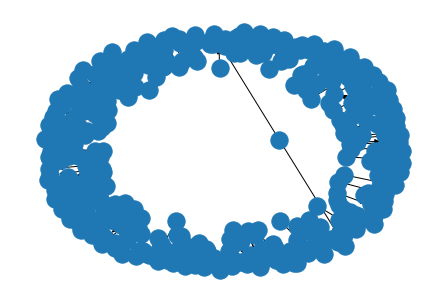

In [ ]:
graph = nx.DiGraph()
graph.add_edges_from(edgs_chain)
nx.draw(graph)

нет связей по центру. Слабая связность

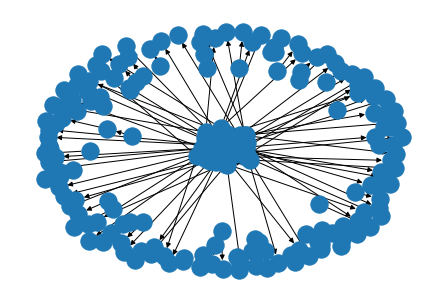

In [ ]:
graph = nx.DiGraph()
graph.add_edges_from(edge_ddos[0][:5000])
nx.draw(graph)

Много связей по центру -> сильная связность -> много транзакций между определенными машинами: DDOS!)

In [8]:
def save_graph(graph,file_name):
  #initialze Figure
  plt.figure(num=None, figsize=(40, 40), dpi=400)
  pos = nx.spring_layout(graph)
  nx.draw_networkx_nodes(graph,pos)
  nx.draw_networkx_edges(graph,pos)
  nx.draw_networkx_labels(graph,pos)

  plt.savefig(file_name)

In [9]:
# save ddosed transaction graphs
graph = nx.DiGraph()
graph.add_edges_from(edge_ddos[0])

save_graph(graph,"my_graph.pdf")

In [ ]:
graph = nx.DiGraph()
graph.add_edges_from(edgs_chain)

save_graph(graph,"normal_trans.pdf")